
# Linear Regression

## **Problem Statements**

The company is trying to decide whether to focus their efforts on their mobile app experience or their website.
This dataset provides details about e-commerce customers and their interactions with the platform. It includes a variety of features that capture customer engagement, such as time spent on the app, website, and session length, along with the total amount they spent annually

### **Column Definition**

- **Email**: The customer's email address.

- **Address**: The full address of the customer, including street, city, state, and ZIP code.

- **Avatar**: The color of the avatar chosen by the customer on the e-commerce platform. This might be a personalized choice and not directly related to their purchasing behavior.

- **Avg. Session Length**: The average length (in minutes) of a customer's session on the platform.

- **Time on App**: The amount of time (in minutes) the customer spent on the e-commerce mobile app during a session.

- **Time on Website**: The amount of time (in minutes) the customer spent on the e-commerce website during a session.

- **Length of Membership**: The number of years the customer has been a member of the e-commerce platform.

- **Yearly Amount Spent**: The total amount (in currency) that the customer spent on the platform in a given year.

## **Imports**

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score

## Reading and Understanding the Data

In [9]:
df= pd.read_csv("Ecommerce Customers.csv")

In [10]:
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [11]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


## Exploratory Data Analysis

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [15]:
df.isna().sum()

Email                   0
Address                 0
Avatar                  0
Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

In [16]:
df.duplicated().sum()

0

<Axes: >

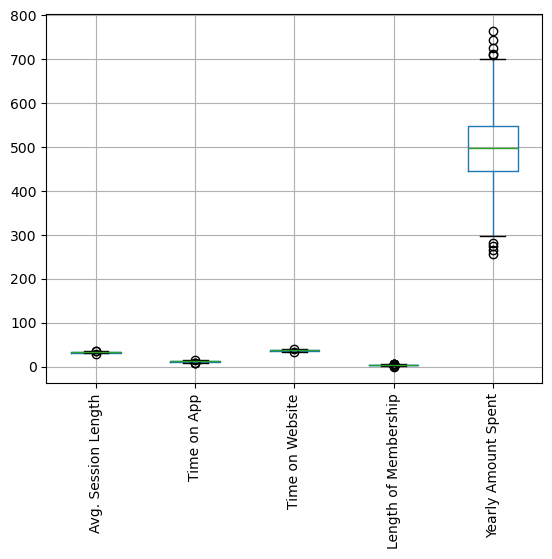

In [17]:
df.select_dtypes(include=np.number).boxplot(rot=90)

In [18]:
df.select_dtypes(include=np.number).corr()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
Avg. Session Length,1.000000,-0.027826,-0.034987,0.060247,0.355088
Time on App,-0.027826,1.000000,0.082388,0.029143,0.499328
Time on Website,-0.034987,0.082388,1.000000,-0.047582,-0.002641
Length of Membership,0.060247,0.029143,-0.047582,1.000000,0.809084
Yearly Amount Spent,0.355088,0.499328,-0.002641,0.809084,1.000000


## Splitting the Feature Data and Label Data

In [20]:
X = df.select_dtypes(include=np.number)
X = X.drop('Yearly Amount Spent',axis=1)

In [21]:
X.head()

,Avg. Session Length,Time on App,Time on Website,Length of Membership
0,34.497268,12.655651,39.577668,4.082621
1,31.926272,11.109461,37.268959,2.664034
2,33.000915,11.330278,37.110597,4.104543
3,34.305557,13.717514,36.721283,3.120179
4,33.330673,12.795189,37.536653,4.446308


In [22]:
Y = df['Yearly Amount Spent']

In [23]:
Y = pd.DataFrame(Y,columns=['Yearly Amount Spent'],index=df.index)

In [24]:
Y

,Yearly Amount Spent
0,587.951054
1,392.204933
2,487.547505
3,581.852344
4,599.406092
...,...
495,573.847438
496,529.049004
497,551.620145
498,456.469510


## Feature Scailing

In [26]:
scaler = MinMaxScaler()

In [27]:
X_scaled = scaler.fit_transform(X)

In [28]:
X_scaled=pd.DataFrame(X_scaled,columns=X.columns)

In [29]:
X_scaled

,Avg. Session Length,Time on App,Time on Website,Length of Membership
0,0.751425,0.626620,0.929816,0.573101
1,0.362306,0.393016,0.550801,0.359869
2,0.524953,0.426378,0.524803,0.576396
3,0.722409,0.787050,0.460890,0.428434
4,0.574861,0.647702,0.594748,0.627768
...,...,...,...,...
495,0.560784,0.764183,0.411098,0.522589
496,0.782491,0.481592,0.537882,0.497028
497,0.471354,0.451931,0.725412,0.704722
498,0.573625,0.586699,0.480394,0.310634


## Training and Testing Data

Spliting the data into training and testing sets.


In [31]:
X_scaled

,Avg. Session Length,Time on App,Time on Website,Length of Membership
0,0.751425,0.626620,0.929816,0.573101
1,0.362306,0.393016,0.550801,0.359869
2,0.524953,0.426378,0.524803,0.576396
3,0.722409,0.787050,0.460890,0.428434
4,0.574861,0.647702,0.594748,0.627768
...,...,...,...,...
495,0.560784,0.764183,0.411098,0.522589
496,0.782491,0.481592,0.537882,0.497028
497,0.471354,0.451931,0.725412,0.704722
498,0.573625,0.586699,0.480394,0.310634


In [32]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.3, random_state=101)

## Training the Model

## Fitting the Regression Model:

In [35]:
lm = LinearRegression()

### **Fitting the Model**

In [37]:
lm.fit(X_train,y_train)

LinearRegression()

**Print out the coefficients of the model**

In [39]:
# The coefficients
print('Coefficients: \n', lm.coef_)
print('Intercept: \n', lm.intercept_)

Coefficients: 
 [[171.66616628 255.42216789   1.15982222 407.67685316]]
Intercept: 
 [70.69310303]


In [40]:
lm.score(X_scaled,Y)

0.9842727142336021

## Predicting Test Data
Now that we have fit our model, let's evaluate its performance by predicting off the test values!



In [42]:
predictions = lm.predict( X_test)

In [43]:
predictions = pd.DataFrame(predictions,columns=Y.columns)

In [44]:
predictions

,Yearly Amount Spent
0,456.441861
1,402.720053
2,409.253154
3,591.431034
4,590.014373
...,...
145,478.300766
146,484.410296
147,457.590999
148,411.526576


** Create a scatterplot of the real test values versus the predicted values. **

In [46]:
predictions.isna().sum()

Yearly Amount Spent    0
dtype: int64

In [47]:
np.corrcoef(Y, predictions).shape

C:\Users\prakhar\anaconda\Lib\site-packages\numpy\lib\function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\prakhar\anaconda\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
C:\Users\prakhar\anaconda\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


(650, 650)

**Error**

In [49]:
error = Y - predictions

error.isna().sum()

Yearly Amount Spent    350
dtype: int64

In [50]:
print(Y.var(), predictions.var()) 

Yearly Amount Spent    6290.834572
dtype: float64 Yearly Amount Spent    7113.585582
dtype: float64


In [51]:
abs_error = np.abs(error)
mae = np.mean(abs_error) # mean absolute error
mae

85.89839550525568

In [52]:
np.mean(np.abs(error / Y)) * 100

17.311411844083104

In [53]:
sse = np.sum(error ** 2,axis=1)
sse

0      17294.667824
1        110.567742
2       6130.005393
3         91.751307
4         88.204391
           ...     
495        0.000000
496        0.000000
497        0.000000
498        0.000000
499        0.000000
Length: 500, dtype: float64

In [54]:
sst = np.sum((Y - Y.mean())**2,axis=1)
sst

0       7856.520554
1      11472.360334
2        138.451308
3       6812.571920
4      10018.419231
           ...     
495     5555.227635
496      884.168195
497     2735.928852
498     1835.653596
499        2.357441
Length: 500, dtype: float64

In [55]:
1 - sse / sst

0      -1.201314
1       0.990362
2     -43.275533
3       0.986532
4       0.991196
         ...    
495     1.000000
496     1.000000
497     1.000000
498     1.000000
499     1.000000
Length: 500, dtype: float64

In [56]:
lm.intercept_ + lm.coef_ * 1.5

array([[328.19235245, 453.82635487,  72.43283635, 682.20838277]])

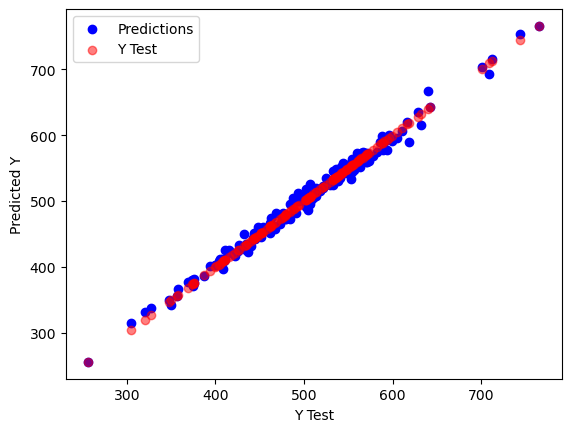

In [57]:
plt.scatter(y_test, predictions, color='blue', label='Predictions')
plt.scatter(y_test, y_test, color='red', alpha=0.5, label='Y Test')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.legend()

## Prediction Using OLS Method

In [59]:
import statsmodels.api as sm
X_11 = sm.add_constant(X_scaled)

In [60]:
X_11

,const,Avg. Session Length,Time on App,Time on Website,Length of Membership
0,1.0,0.751425,0.626620,0.929816,0.573101
1,1.0,0.362306,0.393016,0.550801,0.359869
2,1.0,0.524953,0.426378,0.524803,0.576396
3,1.0,0.722409,0.787050,0.460890,0.428434
4,1.0,0.574861,0.647702,0.594748,0.627768
...,...,...,...,...,...
495,1.0,0.560784,0.764183,0.411098,0.522589
496,1.0,0.782491,0.481592,0.537882,0.497028
497,1.0,0.471354,0.451931,0.725412,0.704722
498,1.0,0.573625,0.586699,0.480394,0.310634


In [61]:
model = sm.OLS(Y,X_11).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Yearly Amount Spent   R-squared:                       0.984
Model:                             OLS   Adj. R-squared:                  0.984
Method:                  Least Squares   F-statistic:                     7766.
Date:                 Sun, 29 Sep 2024   Prob (F-statistic):               0.00
Time:                         01:29:44   Log-Likelihood:                -1856.9
No. Observations:                  500   AIC:                             3724.
Df Residuals:                      495   BIC:                             3745.
Df Model:                            4                                         
Covariance Type:             nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   69.1759      3.004     23.025      0.000      63.273      75.079
Avg. Session Length    170.0323      2.980     57.057      0.000     164.177     175.887
Time on App            256.2098      2.985     85.828      0.000     250.345     262.075
Time on Website          2.6603      2.705      0.983      0.326      -2.655       7.975
Length of Membership   409.6609      2.983    137.346      0.000     403.801     415.521
==============================================================================
Omnibus:                        0.337   Durbin-Watson:                   1.887
Prob(Omnibus):                  0.845   Jarque-Bera (JB):                0.198
Skew:                          -0.026   Prob(JB):                        0.906
Kurtosis:                       3.083   Cond. No.                         13.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Evaluating the Model
Calculating R^2 and MSE 


In [63]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 7.228148653430843
MSE: 79.81305165097457
RMSE: 8.93381506697864


In [64]:
r2 = r2_score(y_test, predictions)
print("R-squared:", r2)

R-squared: 0.9890046246741234


# KNN Regression

In [66]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error 
from math import sqrt

In [67]:
K=3
model = KNeighborsRegressor(n_neighbors = K)

In [68]:
model.fit(X_train, y_train) 

KNeighborsRegressor(n_neighbors=3)

In [69]:
prediction1=model.predict(X_test)

In [70]:
prediction1.shape

(150, 1)

In [71]:
y_test.shape

(150, 1)

In [72]:
error = np.sqrt(mean_squared_error(y_test,prediction1))

In [73]:
error

27.25335543108758

In [74]:
print('RMSE value for k= ' , K , 'is:', error)
print('MSE value for k= ' , K , 'is:', error**2)

RMSE value for k=  3 is: 27.25335543108758
MSE value for k=  3 is: 742.7453822531909


## Choosing the best k

In [76]:
error_rate=[]
for i in range(1,15):
    
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

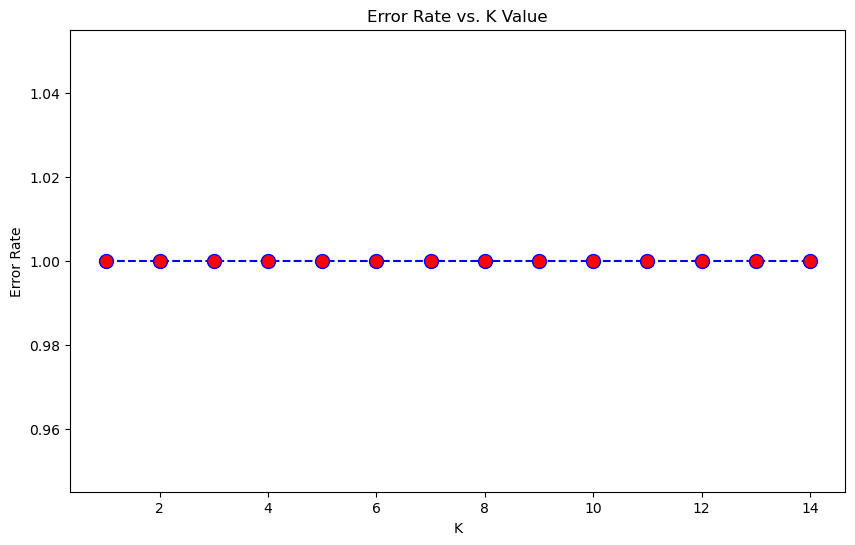

In [77]:
plt.figure(figsize=(10,6))
plt.plot(range(1,15),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

**Inference**:
- The error rate remains constant around 1.00 regardless of the k-value, which suggests that changing k doesn't significantly affect the model's performance.

## Model Evaluation

In [80]:
print('RMSE value for k= ' , K , 'is:', error)
print('MSE value for k= ' , K , 'is:', error**2)

RMSE value for k=  3 is: 27.25335543108758
MSE value for k=  3 is: 742.7453822531909


In [81]:
r2 = r2_score(y_test, prediction1)
print(f'R2 is : {r2}')


R2 is : 0.8976763313705999


# Decision Tree

In [83]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor

# method 1 to visualize decision tree
from sklearn.tree import export_graphviz

# method 2 to visualize decision tree
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

In [84]:
dtr = DecisionTreeRegressor(random_state=42)

In [85]:
model = dtr.fit(X_train,y_train)

In [86]:
export_graphviz(model, out_file ='tree.dot',feature_names =X_train.columns)

[Text(0.5137763444767441, 0.96875, 'Length of Membership <= 0.506\nsquared_error = 5856.861\nsamples = 350\nvalue = 498.723'),
 Text(0.17389625726744187, 0.90625, 'Length of Membership <= 0.361\nsquared_error = 3458.015\nsamples = 191\nvalue = 453.288'),
 Text(0.038081395348837206, 0.84375, 'Length of Membership <= 0.182\nsquared_error = 2786.075\nsamples = 60\nvalue = 402.067'),
 Text(0.011627906976744186, 0.78125, 'Time on App <= 0.51\nsquared_error = 2996.176\nsamples = 9\nvalue = 330.841'),
 Text(0.004651162790697674, 0.71875, 'Length of Membership <= 0.101\nsquared_error = 141.437\nsamples = 4\nvalue = 280.81'),
 Text(0.002325581395348837, 0.65625, 'squared_error = 0.0\nsamples = 1\nvalue = 298.762'),
 Text(0.0069767441860465115, 0.65625, 'Length of Membership <= 0.148\nsquared_error = 45.342\nsamples = 3\nvalue = 274.825'),
 Text(0.004651162790697674, 0.59375, 'squared_error = 0.0\nsamples = 1\nvalue = 266.086'),
 Text(0.009302325581395349, 0.59375, 'Length of Membership <= 0.178

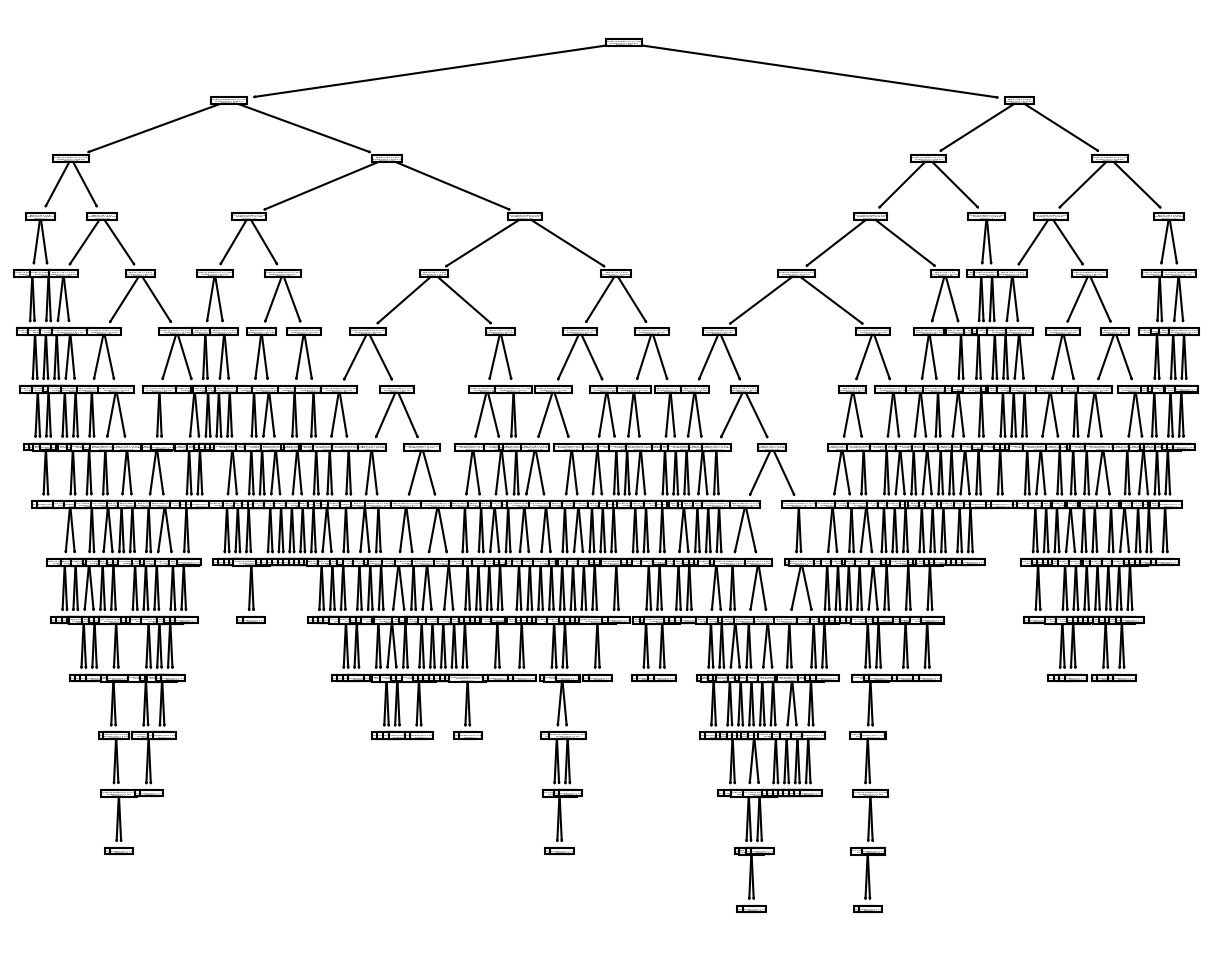

In [154]:
feature_names =X_train.columns
plt.figure(figsize=(10,8), dpi=150)
plot_tree(model, feature_names=feature_names)

In [158]:
predictions2 = model.predict(X_test)

In [163]:
predictions

array([436.51560573, 392.28524425, 424.67528101, 591.19717818,
       604.84131882, 536.42310453, 613.59932337, 725.58481406,
       468.44573723, 570.63009809, 352.55010816, 420.91615953,
       570.45172591, 378.47356645, 725.58481406, 570.63009809,
       627.60331871, 503.21739312, 527.78378976, 557.60826205,
       442.06441376, 604.33484007, 475.0716299 , 514.33655827,
       563.67287336, 468.44573723, 503.21739312, 357.86371864,
       503.21739312, 457.84769594, 630.42276323, 626.01867266,
       444.54554965, 541.04983096, 468.91350132, 558.94811239,
       441.89663152, 482.83098586, 456.46951007, 444.54554965,
       584.21831349, 424.67528101, 608.27181662, 529.23009012,
       546.55666686, 511.97985999, 533.51493526, 511.97985999,
       378.33090691, 463.4849954 , 508.73574095, 518.78648309,
       298.76200786, 508.73574095, 562.08204539, 298.76200786,
       492.94505307, 422.36873661, 478.71935687, 436.72055586,
       503.21739312, 581.30893288, 669.9871405 , 530.76

## Evaluation of Model

In [161]:
mse = mean_squared_error(y_test, predictions2)
r2 = r2_score(y_test, predictions2)
print(f'Mean Squared Error: {mse}')
print(f'R²: {r2}')

Mean Squared Error: 868.2601655084208
R²: 0.8803848969211008
